# The Stochastic Behavior of Commodity Prices: Implications for Valuation and Hedging. Eduardo Schwartz (July 1997).

### Author: Jeremy Marck.

**The aim of this notebook** is to illustrate the main results from "The Stochastic Behavior of Commodity Prices: Implications for Valuation and Hedging" by Eduardo Schwartz. Three models are developed with the objective to describe the stochastic behavior of commodity prices. As far as spot prices are often very uncertain, a good proxy is the closest futures contract price. We will birefly present the models and then discuss their main implications.

**Strengths and weaknesses.** One of the strength of the article is to manipulate convenient models which conduce to closed-form solutions for futures prices. It is convenient as it allows to drive some comparative statics, calibrating the models with estimated parameters. As an evidence, this calibration suffers from a strength because the value of the estimators depends on the data available and the observed futures contracts available through the period. These contracts are mainly short-term contracts.

For the sake of simplicity, we will mainly focus on model 1 and 2 because of the following reasons: 

**(1)** They produce different results and induce different implications while models 2 and 3 often conduce to convergent results.

**(2)** The estimation of the model 3 is a little bit different thant the theorical model developed. 

**Main implications.** The article purposes an analysis of the implications of these models in terms of :

**(1)** Volatility of Futures returns.

**(2)** Long maturity Futures contracts.

**(3)** Investment under uncertainty.

We will discuss the sensitivity of these notions with respect to the parameters of the model. 

**Notebook content.** We will present the models and purpose a simulation of each one under the convenient martingale measure. An average of the estimated parameters will be provided. This will be useful when performing the analysis of comparative statics elements.


In [1]:
# Packages importation.
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from random import gauss

## (1) Presenting and simulating the models.

$S$ will denote the spot price, $X := \ln (S)$, $r$ will be the interest rate (calibrated at 0.06 level), $\sigma$ the volatility parameter and $z$ increments of a standard Brownian motion.

### A. Model 1.

This is a standard mean reverting model (Ornstein-Uhlenbeck stochastic process). Main equations are: $dS = \kappa (\mu - \ln S) S dt + \sigma S dz$. The stochastic differential equation for $X$ under the convenient martingale measure is $dX = \kappa (\alpha^{*} - X) dt + \sigma dz^{*}$. Discretization writes down: $X_{t+\Delta_t} - X_t = \kappa (\alpha^{*} - X_t)\Delta_t + \sigma \sqrt{\Delta_t} \mathcal{N}(0,1)$ where $\alpha^{*} = \mu - \frac{\sigma^2}{2 \kappa} - \lambda$. 

Note: $M$ will be the number of time steps in a simulation. Hence $dt = T/M$.

***Parameters interpretation is available on the joint PDF.***

Finally, the futures (or forward) price of the commodity with maturity T can be written: 

$F(S,T) = \exp\left[e^{-\kappa T} \ln S + (1 - e^{-\kappa T})\alpha^{*} + \frac{\sigma^2}{4 \kappa}(1 - e^{-2 \kappa T})\right]$

#### A.1. Model simulation, basic implementation.

The following two function are to simulate X trajectories and provides the futures prices from model 1. They will be useful when performing comparative statics (section A.2.).

In [328]:
def X_simulator_model1(S0, k, mu, sigma, lamb, M, T, nb_simul):
    dt = T/M
    res = []
    for j in range(nb_simul):
        simul = [np.log(S0)]
        for i in range(1,M+1):
            z = gauss(0,1)
            X = simul[-1] + k*(mu - 0.5*sigma**2/k - lamb - simul[-1])*dt + sigma*np.sqrt(dt)*z
            simul.append(X)
        res.append(simul)
    return res

def futures_prices_model1(S, k, mu, sigma, lamb,T):
    return np.exp(np.exp(-k*T)*np.log(S) + (1 - np.exp(-k*T))*(mu - 0.5*sigma**2/k - lamb) + ((sigma**2)/(4*k))*(1 - np.exp(-2*k*T)))

**Using copper estimated parameters.** list_parameters_model1_copper = $[S_0, \kappa, \mu, \sigma, \lambda ]$ = [0.9, 0.369, 4.85, 0.233, -0.339]. These values are the ones obtained while estimating over the 1988-1995 period.

Runing some simulations using estimated parameters for copper (page 938) and for an initial price starting at 0.9 in 1988. https://www.macrotrends.net/1476/copper-prices-historical-chart-data

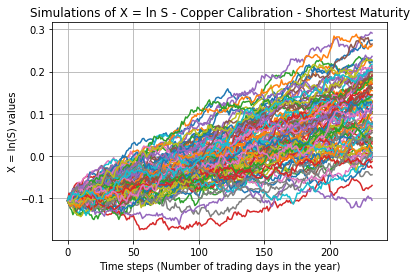

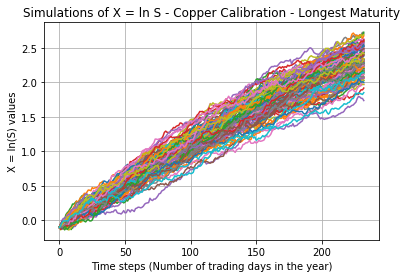

In [329]:
a = X_simulator_model1(0.9, 0.369, 4.85, 0.233, -0.339, 232, 0.109, 100)
for elem in a:
    plt.plot(elem)
plt.title('Simulations of X = ln S - Copper Calibration - Shortest Maturity')
plt.xlabel('Time steps (Number of trading days in the year)')
plt.ylabel('X = ln(S) values')
plt.grid(True)
plt.show()

a = X_simulator_model1(0.9, 0.369, 4.85, 0.233, -0.339, 232, 1.663, 100)
for elem in a:
    plt.plot(elem)
plt.title('Simulations of X = ln S - Copper Calibration - Longest Maturity')
plt.xlabel('Time steps (Number of trading days in the year)')
plt.ylabel('X = ln(S) values')
plt.grid(True)
plt.show()

One observes clearly different implications of the model using these estimated parameters when varying the maturity. 

Regarding the shortest maturity (F1 contract), X values are sometimes increasing and other times decreasing. 

Regarding longest maturity, X values are always increasing. 

**Using Oil estimated parameters.** https://inflationdata.com/articles/inflation-adjusted-prices/historical-crude-oil-prices-table/

list_parameters_oil_model1_85_95 = $[S_0, \kappa, \mu, \sigma, \lambda ]$ = [25, 0.301, 3.093, 0.334, -0.2429].

Note that gold could not fit the data!

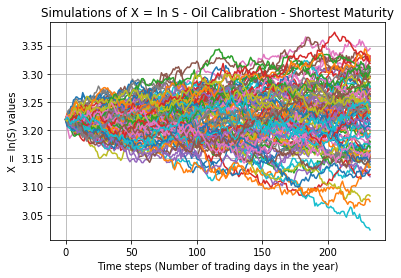

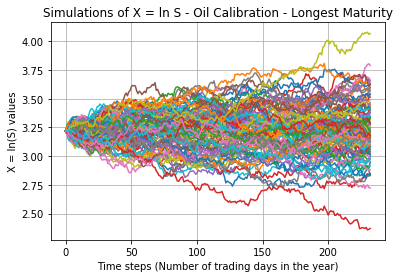

In [330]:
a = X_simulator_model1(25, 0.301, 3.093, 0.334, -0.242, 232, 0.043, 100)
for elem in a:
    plt.plot(elem)
plt.title('Simulations of X = ln S - Oil Calibration - Shortest Maturity')
plt.xlabel('Time steps (Number of trading days in the year)')
plt.ylabel('X = ln(S) values')
plt.grid(True)
plt.show()

a = X_simulator_model1(25, 0.301, 3.093, 0.334, -0.242, 232, 0.71, 100)
for elem in a:
    plt.plot(elem)
    plt.title('Simulations of X = ln S - Oil Calibration - Longest Maturity')
    plt.xlabel('Time steps (Number of trading days in the year)')
    plt.ylabel('X = ln(S) values')
    plt.grid(True)
plt.show()

The range of values is much larger for the longest maturity.

**A.2. Comparative statics of the Futures (Forward) prices.**

$F(S,T) = \exp\left[e^{-\kappa T} \ln S + (1 - e^{-\kappa T})\alpha^{*} + \frac{\sigma^2}{4 \kappa}(1-e^{-2\kappa T})\right] = \exp\left[e^{-\kappa T} \ln S + (1 - e^{-\kappa T})\alpha^{*} + \frac{\sigma^2}{4 \kappa}(1-e^{-2\kappa T})\right]$. 

We will drive the analysis for both copper and oil, with associated estimated parameters. This analysis is graphical. The ojective is to detect the sensitivity of the futures (forward) price with respect to the spot price and the time to maturity.

***Estimated parameters.***

list_parameters_model1_copper = $[S_0, \kappa, \mu, \sigma, \lambda ]$ = [0.9, 0.369, 4.85, 0.233, -0.339]. Observed maturities range is (0.109,1.663).

list_parameters_oil_model1_85_95 = $[S_0, \kappa, \mu, \sigma, \lambda ]$ = [25, 0.301, 3.093, 0.334, -0.2429]. Observed maturities range is (0.043,0.71).

***Using copper parameters.***

The following piece of code plots the evolution of the future price when $S$ and $T$ increase respectively. 

In [331]:
l_initial_prices = [0.8 + 0.01*i for i in range(500)]
l_initial_maturities = [0.1 + 0.01*i for i in range(800)]

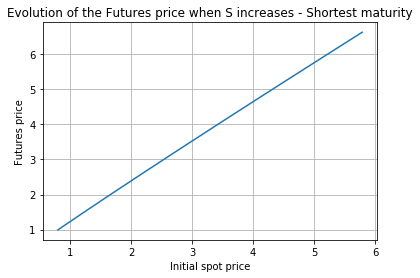

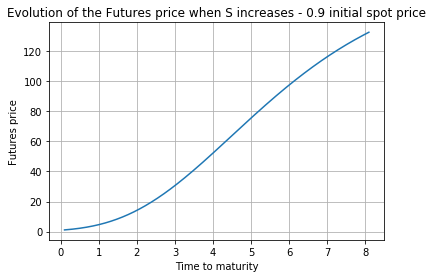

In [332]:
# Evolution of the Futures prices when only S increases.
l = []
for elem in l_initial_prices:
    a = futures_prices_model1(elem,0.369,4.85,0.233,-0.339,0.109)
    l.append(a)
plt.plot(l_initial_prices,l)
plt.title('Evolution of the Futures price when S increases - Shortest maturity')
plt.xlabel('Initial spot price')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

# Evolution of the Futures prices when only T increases.
l = []
for elem in l_initial_maturities:
    a = futures_prices_model1(0.9,0.369,4.85,0.233,-0.339,elem)
    l.append(a)
plt.plot(l_initial_maturities,l)
plt.title('Evolution of the Futures price when S increases - 0.9 initial spot price')
plt.xlabel('Time to maturity')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

It is clear that as far as initial spot price increases, the price of the Futures contract increases. It is also the case when the time to maturity increases.

The same task is performed but for longest observed maturities (regarding the evolution of Futures prices when $S$ increases) and for higher initial spot price (regarding the evolution with respect to time to maturity).

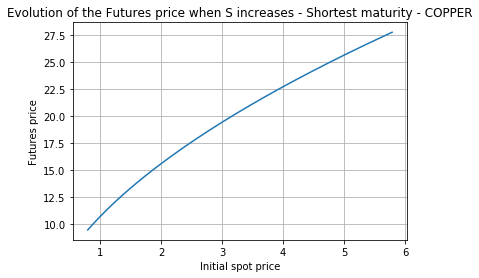

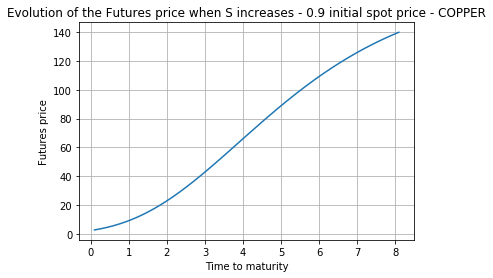

In [333]:
# Evolution of the Futures prices when only S increases.
l = []
for elem in l_initial_prices:
    a = futures_prices_model1(elem,0.369,4.85,0.233,-0.339,1.663)
    l.append(a)
plt.plot(l_initial_prices,l)
plt.title('Evolution of the Futures price when S increases - Shortest maturity - COPPER')
plt.xlabel('Initial spot price')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

# Evolution of the Futures prices when only T increases.
l = []
for elem in l_initial_maturities:
    a = futures_prices_model1(2.5,0.369,4.85,0.233,-0.339,elem)
    l.append(a)
plt.plot(l_initial_maturities,l)
plt.title('Evolution of the Futures price when S increases - 0.9 initial spot price - COPPER')
plt.xlabel('Time to maturity')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

**Remarks:** The sensitivity of the Futures price with respect to the spot price is not identical for different maturity dates (it seems to have become concave right now) !

The following piece the same task but for the log of Futures prices.

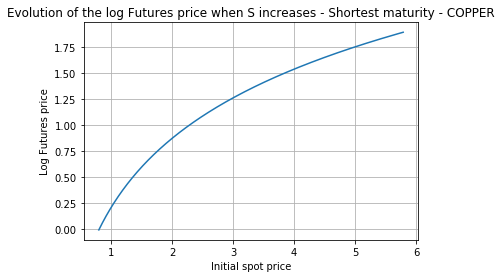

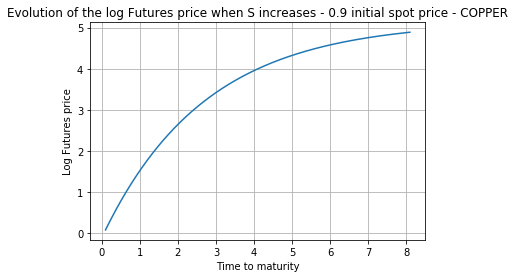

In [334]:
# Evolution of the log Futures prices when only S increases.
l = []
for elem in l_initial_prices:
    a = futures_prices_model1(elem,0.369,4.85,0.233,-0.339,0.109)
    l.append(np.log(a))
plt.plot(l_initial_prices,l)
plt.title('Evolution of the log Futures price when S increases - Shortest maturity - COPPER')
plt.xlabel('Initial spot price')
plt.ylabel('Log Futures price')
plt.grid(True)
plt.show()

# Evolution of the log Futures prices when only T increases.
l = []
for elem in l_initial_maturities:
    a = futures_prices_model1(0.9,0.369,4.85,0.233,-0.339,elem)
    l.append(np.log(a))
plt.plot(l_initial_maturities,l)
plt.title('Evolution of the log Futures price when S increases - 0.9 initial spot price - COPPER')
plt.xlabel('Time to maturity')
plt.ylabel('Log Futures price')
plt.grid(True)
plt.show()

***Using oil parameters.***

The following piece of code plots the evolution of the future price when $S$ and $T$ increase respectively. 

In [335]:
l_initial_prices = [25 + 0.01*i for i in range(2000)]
l_initial_maturities = [0.043 + 0.01*i for i in range(70)]

list_parameters_oil_model1_85_95 = $[S_0, \kappa, \mu, \sigma, \lambda ]$ = [25, 0.301, 3.093, 0.334, -0.2429]. Observed maturities range is (0.043,0.71).

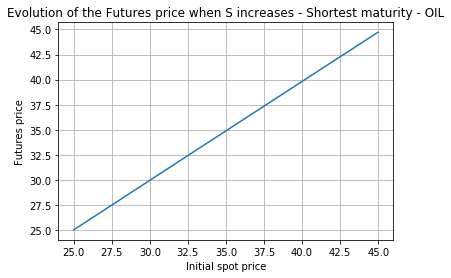

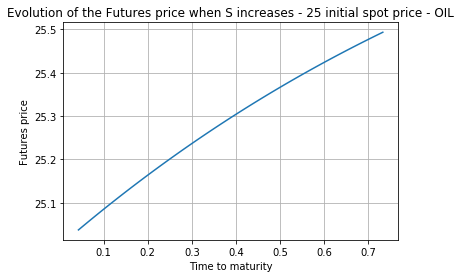

In [336]:
# Evolution of the Futures prices when only S increases.
l = []
for elem in l_initial_prices:
    a = futures_prices_model1(elem,0.301,3.093,0.334,-0.2429,0.043)
    l.append(a)
plt.plot(l_initial_prices,l)
plt.title('Evolution of the Futures price when S increases - Shortest maturity - OIL')
plt.xlabel('Initial spot price')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

# Evolution of the Futures prices when only T increases.
l = []
for elem in l_initial_maturities:
    a = futures_prices_model1(25,0.301,3.093,0.334,-0.2429,elem)
    l.append(a)
plt.plot(l_initial_maturities,l)
plt.title('Evolution of the Futures price when S increases - 25 initial spot price - OIL')
plt.xlabel('Time to maturity')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

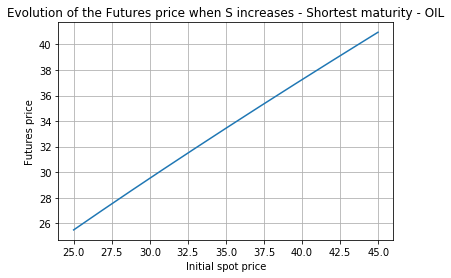

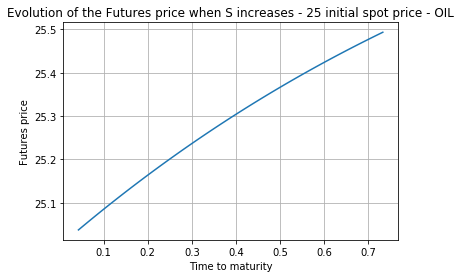

In [337]:
# Evolution of the Futures prices when only S increases.
l = []
for elem in l_initial_prices:
    a = futures_prices_model1(elem,0.301,3.093,0.334,-0.2429,0.71)
    l.append(a)
plt.plot(l_initial_prices,l)
plt.title('Evolution of the Futures price when S increases - Shortest maturity - OIL')
plt.xlabel('Initial spot price')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

# Evolution of the Futures prices when only T increases.
l = []
for elem in l_initial_maturities:
    a = futures_prices_model1(25,0.301,3.093,0.334,-0.2429,elem)
    l.append(a)
plt.plot(l_initial_maturities,l)
plt.title('Evolution of the Futures price when S increases - 25 initial spot price - OIL')
plt.xlabel('Time to maturity')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

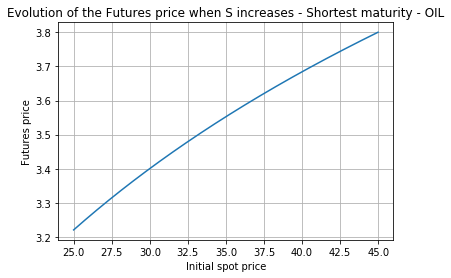

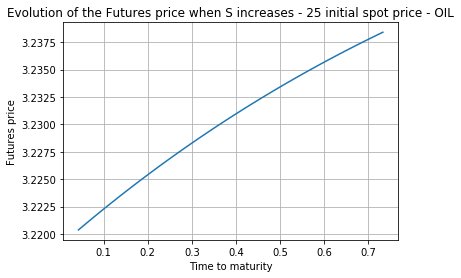

In [338]:
# Evolution of the Futures prices when only S increases.
l = []
for elem in l_initial_prices:
    a = futures_prices_model1(elem,0.301,3.093,0.334,-0.2429,0.043)
    l.append(np.log(a))
plt.plot(l_initial_prices,l)
plt.title('Evolution of the Futures price when S increases - Shortest maturity - OIL')
plt.xlabel('Initial spot price')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

# Evolution of the Futures prices when only T increases.
l = []
for elem in l_initial_maturities:
    a = futures_prices_model1(25,0.301,3.093,0.334,-0.2429,elem)
    l.append(np.log(a))
plt.plot(l_initial_maturities,l)
plt.title('Evolution of the Futures price when S increases - 25 initial spot price - OIL')
plt.xlabel('Time to maturity')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

Same conclusions can be applied.

**Conclusions:** One can say that using the estimated parameters both for copper and oil, model 1 implies that the futures prices are linearly increasing with the stop price and the time to maturity.

### B. Model 2.

#### B.1. Model simulation, basic implementation.

**Recalling formulas.** In this model, both the spot price and the convenience yield are stochastic. The dynamics for the spot price is: $dS = (r - \delta)Sdt + \sigma_1 S dz_1^*$. The dynamics for the convenience yield is: $d \delta = \left[\kappa(\alpha - \delta) - \lambda\right]dt + \sigma_2 dz_2^*$ and we also have $dz_1^* dz_2^* = \rho dt$. 

Discretization writes down: $S_{t + \Delta_t} = S_t + (r - \delta_t)S_t \Delta_t + \sigma_1 S_t \sqrt{\Delta_t} \mathcal{N}(0,1)$ where $\alpha^{*} = \mu - \frac{\sigma^2}{2 \kappa} - \lambda$ and $\delta_{t+\Delta_t} = \delta_t + \left[\kappa (\alpha - \delta_t) - \lambda \right]\Delta_t + \sigma_2 \sqrt{\Delta_t} \mathcal{N}(0,1)$ and $z_2 = \rho z_1 + \sqrt{1 - \rho^2}z^*$ where $z^*$ is a Brownian motion independent of $z_1$.

***Parameters interpretation is available on the joint PDF.***

Note that $r = 0.06$ which is the average interest rate observed over the period.

Finally, the futures (or forward) price of the commodity with maturity T can be written: 

$F(S,T) = \displaystyle S \exp\left[- \delta \frac{e^{-\kappa T}}{\kappa} + \left(r - \alpha + \frac{\lambda}{\kappa} + \frac{\sigma_2^2}{2 \kappa^2} - \frac{\sigma_1 \sigma_2 \rho}{\kappa}\right)T + \frac{\sigma_2^2}{4}\frac{1 - e^{-2 \kappa T}}{\kappa^3} + \left(\kappa(\alpha - \frac{\lambda}{\kappa}) + \sigma_1 \sigma_2 \rho - \frac{\sigma_2^2}{\kappa}\right)\frac{1 - e^{-\kappa T}}{\kappa^2}\right]$

In [364]:
def simulator_model2(S_0, delta_0, mu, k, alpha, sigma1, sigma2, lamb, rho, T, M, n_simul):
    dt = T/M
    S_simul = []
    delta_simul = []
    for j in range(n_simul):
        res_S = [S_0]
        res_delta = [delta_0]
        for i in range(1,M):
            z = gauss(0,1)
            zstar = gauss(0,1)
            S = res_S[-1] + (0.06 - res_delta[-1])*res_S[-1]*dt + sigma1*res[-1]*np.sqrt(dt)*z
            delta = res_delta[-1] + (k*(alpha - res_delta[-1]) - lamb)*dt + sigma2*np.sqrt(dt)*(rho*z + np.sqrt(1 - rho**2)*zstar)
            res_S.append(S)
            res_delta.append(delta)
        S_simul.append(res_S)
        delta_simul.append(res_delta)
    return S_simul, delta_simul

**Using copper estimated parameters.** list_parameters_model1_copper = $[S_0, \delta_0, \mu ,\kappa, \alpha, \sigma_1, \sigma_2, \rho, \lambda ]$ = [0.9, 0.25, 0.326, 1.156, 0.248, 0.274, 0.28, 0.818, 0.256]. These estimations have been made over the 88-95 period.

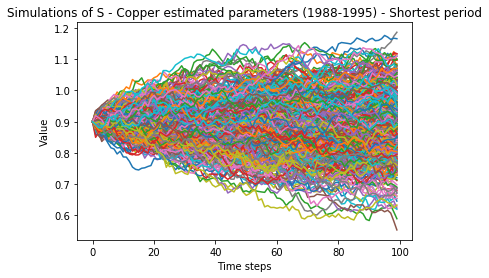

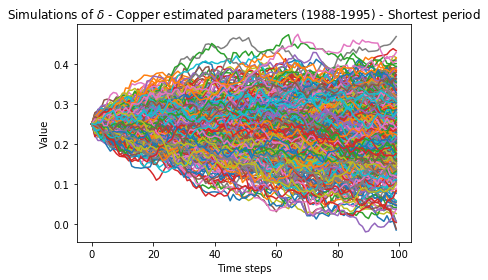

In [385]:
a = simulator_model2(0.9, 0.25, 0.326, 1.156, 0.248, 0.274, 0.28, 0.256, 0.818, 0.109, 100, n_simul = 500)

for i in range(len(a[0])):
    plt.plot(a[0][i])
    plt.title('Simulations of S - Copper estimated parameters (1988-1995) - Shortest period')
    plt.xlabel('Time steps')
    plt.ylabel('Value')
plt.show()

for i in range(len(a[1])):
    plt.plot(a[1][i])
    plt.title('Simulations of $\delta$ - Copper estimated parameters (1988-1995) - Shortest period')
    plt.xlabel('Time steps')
    plt.ylabel('Value')
plt.show()

This simulation is made over the smallest time to maturity observed for futures gold contracts ($T = 0.109$).


**Using Gold estimated parameters.** list_parameters_model1_Gold = $[S_0, \delta_0, \mu ,\kappa, \alpha, \sigma_1, \sigma_2, \rho, \lambda ]$ = [379, 0.018, 0.039, 0.011, -0.002, 0.135, 0.016, 0.056, 0.0067]. These estimations have been made over the 85-95 period.

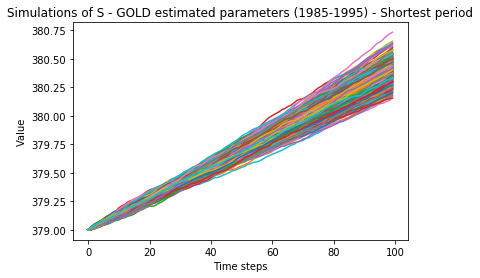

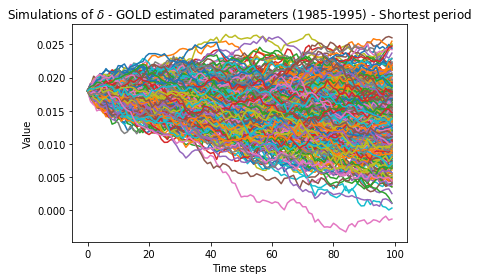

In [388]:
a = simulator_model2(379, 0.018, 0.039, 0.011, -0.002, 0.135, 0.016, 0.056, 0.0067, T = 0.084,100, n_simul = 500)

for i in range(len(a[0])):
    plt.plot(a[0][i])
    plt.title('Simulations of S - GOLD estimated parameters (1985-1995) - Shortest period')
    plt.xlabel('Time steps')
    plt.ylabel('Value')
plt.show()

for i in range(len(a[1])):
    plt.plot(a[1][i])
    plt.title('Simulations of $\delta$ - GOLD estimated parameters (1985-1995) - Shortest period')
    plt.xlabel('Time steps')
    plt.ylabel('Value')
plt.show()

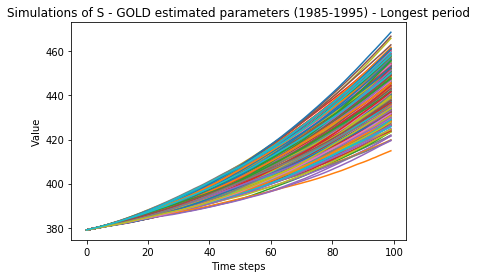

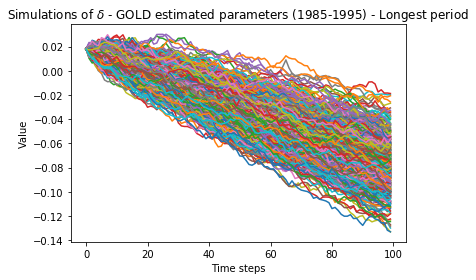

In [392]:
a = simulator_model2(379, 0.018, 0.039, 0.011, -0.002, 0.135, 0.016, 0.056, 0.0067,1.749,100, n_simul = 500)

for i in range(len(a[0])):
    plt.plot(a[0][i])
    plt.title('Simulations of S - GOLD estimated parameters (1985-1995) - Longest period')
    plt.xlabel('Time steps')
    plt.ylabel('Value')
plt.show()

for i in range(len(a[1])):
    plt.plot(a[1][i])
    plt.title('Simulations of $\delta$ - GOLD estimated parameters (1985-1995) - Longest period')
    plt.xlabel('Time steps')
    plt.ylabel('Value')
plt.show()

The general trend for the gold spot price is increasing, while the associated convenience yield is decreasing.

**Futures prices.**
Recall that the Futures (or Forward) price of the commodity with maturity T can be written: 

$F(S,\delta,T) = \displaystyle S \exp\left[- \delta \frac{e^{-\kappa T}}{\kappa} + \left(r - \alpha + \frac{\lambda}{\kappa} + \frac{\sigma_2^2}{2 \kappa^2} - \frac{\sigma_1 \sigma_2 \rho}{\kappa}\right)T + \frac{\sigma_2^2}{4}\frac{1 - e^{-2 \kappa T}}{\kappa^3} + \left(\kappa(\alpha - \frac{\lambda}{\kappa}) + \sigma_1 \sigma_2 \rho - \frac{\sigma_2^2}{\kappa}\right)\frac{1 - e^{-\kappa T}}{\kappa^2}\right]$

In [403]:
def futures_prices_model2(S,delta,k,alpha,T,lamb,sigma1,sigma2,rho):
    res = S*np.exp(-delta*(np.exp(-k*T))/(k) + \
                   (0.06 - alpha + lamb/k + (sigma2**2)/(2*k**2) - (sigma1*sigma2*rho)/(k))*T \
                   + sigma2*sigma2/(4)*(1 - np.exp(-2*k*T))/(k*k*k)\
                   + (k*(alpha - lamb/k) + sigma1*sigma2*rho - (sigma2**2)/(k))*((1 - np.exp(-k*T)))/(k*k))
    return round(res,3)

#### B.2. Comparative statics.

**Important: the analysis is run on the model calibrated on the Copper parameters over the period 1988 - 1995.**

list_parameters_model1_copper = $[S_0, \delta_0, \mu ,\kappa, \alpha, \sigma_1, \sigma_2, \rho, \lambda ]$ = [0.9, 0.25, 0.326, 1.156, 0.248, 0.274, 0.28, 0.818, 0.256]

**Evolution of the Futures prices when the spot price increases evolves.**

Range of the spot prices: [ 0.9 , 1.89 ]


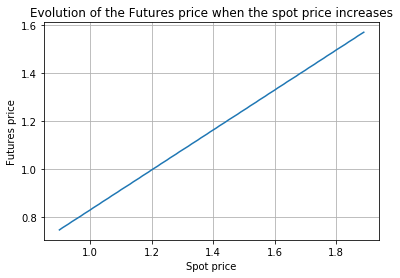

In [445]:
l_spot = [0.9 + 0.01*i for i in range(100)]
print('Range of the spot prices: [', l_spot[0], ',', round(l_spot[-1],2),']')
l_futures = []
for elem in l_spot:
    a = futures_prices_model2(elem, 0.25,1.156,0.248,0.109,0.256,0.274,0.28,0.818)
    l_futures.append(a)
plt.plot(l_spot, l_futures)
plt.title('Evolution of the Futures price when the spot price increases')
plt.xlabel('Spot price')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

Unsurprisingly, as far as the spot price increases, the Futures price increases linearly.

**Evolution of the Futures prices when the convenience yield evolves.** Data recuperated from the simulator. Initial price is 0.9.

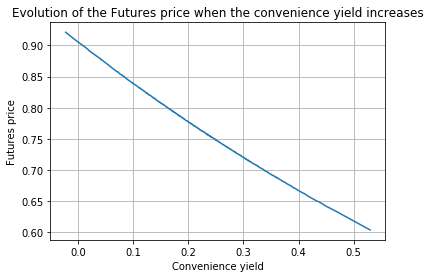

In [448]:
# Simulating some scenarii for the convenience yield and recuperated the values over 
# a short period (calibration: Copper data - 1988-1995).
a = simulator_model2(0.9, 0.25, 0.326, 1.156, 0.248, 0.274, 0.28, 0.256, 0.818, 0.109, 100, n_simul = 500)
l_conv = []
for i in range(len(a[1])):
    l_conv.append(a[1][i][-1])
l_conv = sorted(l_conv) # Sorting the convenience yield list.

l_futures = []
for elem in l_conv:
    a = futures_prices_model2(0.9, elem, 1.156, 0.248, 0.109, 0.256, 0.274, 0.28, 0.818)
    l_futures.append(a)

plt.plot(l_conv, l_futures)
plt.title('Evolution of the Futures price when the convenience yield increases')
plt.xlabel('Convenience yield')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

**Evolution of the Futures prices when time to maturity evolves.** Data recuperated from the simulator. Initial price is 0.9. Ceteris Paribus and keeping the Copper calibrated parameters.

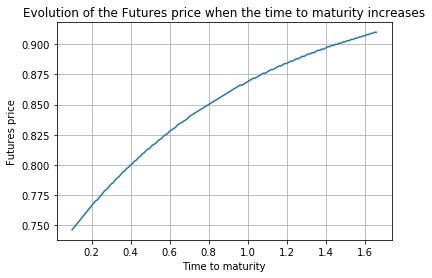

In [451]:
# Building the list_time
l_time = [0.1 + 0.01*i for i in range(157)]

# Recuperating the associated futures prices.
l_futures = []
for elem in l_time:
    a = futures_prices_model2(0.9, 0.25, 1.156, 0.248, elem, 0.256, 0.274, 0.28, 0.818)
    l_futures.append(a)

plt.plot(l_time, l_futures)
plt.title('Evolution of the Futures price when the time to maturity increases')
plt.xlabel('Time to maturity')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

Let us produce the analysis back again with Gold calibrated parameters.

**Important: the analysis is run on the model calibrated on the Gold parameters over the period 1985 - 1995.**

list_parameters_model1_copper = $[S_0, \delta_0, \mu ,\kappa, \alpha, \sigma_1, \sigma_2, \rho, \lambda ]$ = [379, 0.018, 0.039, 0.011, -0.002, 0.135, 0.016, 0.056, 0.0067]

**Evolution of the Futures prices when the spot price increases evolves.**

In [ ]:
def futures_prices_model2(S,delta,k,alpha,T,lamb,sigma1,sigma2,rho):

Range of the spot prices: [ 379 , 478 ]


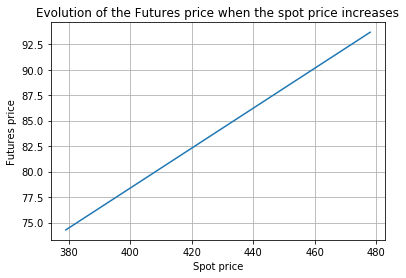

In [455]:
l_spot = [379 + 1*i for i in range(100)]
print('Range of the spot prices: [', l_spot[0], ',', round(l_spot[-1],2),']')
l_futures = []
for elem in l_spot:
    a = futures_prices_model2(elem,0.018, 0.011, -0.002,0.084,0.0067,0.135,0.016,0.056)
    l_futures.append(a)
plt.plot(l_spot, l_futures)
plt.title('Evolution of the Futures price when the spot price increases')
plt.xlabel('Spot price')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

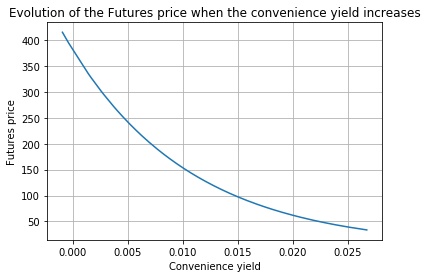

In [456]:
a = simulator_model2(379, 0.018, 0.039, 0.011, -0.002, 0.135, 0.016, 0.056, 0.0067,0.084,100, n_simul = 500)
l_conv = []
for i in range(len(a[1])):
    l_conv.append(a[1][i][-1])
l_conv = sorted(l_conv) # Sorting the convenience yield list.

l_futures = []
for elem in l_conv:
    a = futures_prices_model2(379,elem, 0.011, -0.002,0.084,0.0067,0.135,0.016,0.056)
    l_futures.append(a)

plt.plot(l_conv, l_futures)
plt.title('Evolution of the Futures price when the convenience yield increases')
plt.xlabel('Convenience yield')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

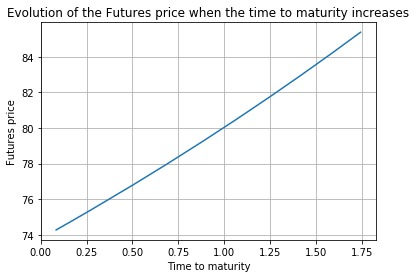

In [463]:
# Getting the list_time
l_time = [0.084 + 0.01*i for i in range(167)]
l_time[-1]

l_futures = []
for elem in l_time:
    a = futures_prices_model2(379,0.018, 0.011, -0.002, elem,0.0067,0.135,0.016,0.056)
    l_futures.append(a)

plt.plot(l_time, l_futures)
plt.title('Evolution of the Futures price when the time to maturity increases')
plt.xlabel('Time to maturity')
plt.ylabel('Futures price')
plt.grid(True)
plt.show()

Same conclusions.

### C. Model 3.

As far as the estimation is a little different than the model presented in the article, one will not simulate this model but only give a quick presentation of the equations. We will also purpose an algorithm simulating the dynamics of the interest rate in the so called Vasicek model. This model can be considered as an extension of model 2, with the specificity that the interest rate becomes stochastic (Vasicek dynamics : 1977). 

**Equations describing the dynamics:** under the convenient martingale measure, we have: $dS = (r - \delta)S dt + \sigma_1 S dz_1^{*}$, $d \delta = \kappa (\widehat{\alpha} - \delta) dt + \sigma_2 dz_2^{*}$ and (Vasicek) $dr = a(m^{*} - r)dt + \sigma_3 dz_3^*$. Joint dynamics characterization: $dz_1^* dz_2^* = \rho_1 dt$, $dz_2^* dz_3^* = \rho_2 dt$ and $dz_1^* dz_3^* = \rho_3 dt$.

**Futures prices equation:** $F(S,\delta, r, T) = S \exp \left[\frac{-\delta(1-e^{-\kappa T})}{\kappa} + \frac{r(1-e^{-aT})}{a} + C(T)\right]$ where $C(T)$ is a deterministic function. 

**Implementing the Vasicek Model.**

The model can be written as $dr_t = a(b-r_t)dt + \sigma dW_t$. Using $Y_t = r_t e^{at}$, Itô's Lemma and IPP formula, one can show that : $r_t = r_0 e^{-at} + b\left[1 - e^{-at}\right] + \sigma \int_{0}^{t} e^{-a(t-s)}dW_s$. This implies that $\mathbb{E}[r_t] = r_0 e^{-at} + b\left[1 -e^{-at}\right]$ and $V(r_t) = e^{-2at}V(r_0) + \frac{\sigma^2}{2a} \left[1 - e^{-2at}\right]$ when (and only when) $r_0$ is a gaussian random variable independant from the standard brownian motion $W$. Otherwise, it is an observed interest rate (this is the version we will implement). 

**Applying Euler Scheme:** $dr_t = a(b -r_t)dt + \sigma dW_t \iff r_{t+\Delta t} = r_t + a(b - r_t)d_t + \sigma \sqrt{\Delta t}\mathcal{N}(0,1)$.

The following function returns simulated paths for the interest rate. Parameters used are the ones from Gold calibration available through the article (page 945). $T$ is time to maturity, and $M$ the number of time steps used while simulating. Parameters : $a = 0.2$, $m = 0.7$, $\sigma = 0.0087$, $T = 5$, $r_0 = 0.06$. Note: estimated parameters are not very different for oil and copper!

In [39]:
def vasicek_simulator(r0,a,b,sigma,n_simul,M,T):
    dt = T/M
    l_path = []
    for i in range(n_simul):
        path = [r0]
        for t in range(1,M+1):
            z = gauss(0,1)
            r = path[-1] + a*(b - path[-1])*dt + sigma*np.sqrt(dt)*z
            path.append(r)
        l_path.append(path)
    return l_path

Runing 10 000 simulations.

In [40]:
a = vasicek_simulator(0.06, 0.2, 0.07, 0.0087, 10000, 1000, 5)

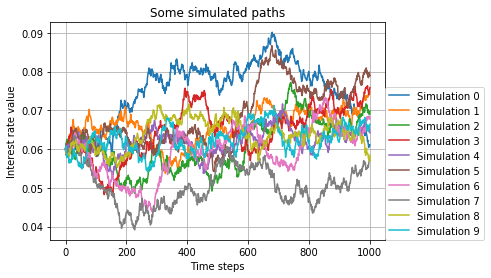

In [48]:
for i in range(10):
    plt.plot(a[i], label = 'Simulation %s'%i)
    plt.title('Some simulated paths')
    plt.ylabel('Interest rate value')
    plt.xlabel('Time steps')
    plt.legend(loc = [1,0])
    plt.grid(True)
plt.show()

Let us implement the mean and the variance functions when considering that $r_0$ is observed (hence, not stochastic).

$\mathbb{E}[r_t] = r_0 e^{-at} + b\left[1 -e^{-at}\right]$ and $V(r_t) = e^{-2at}V(r_0) + \frac{\sigma^2}{2a} \left[1 - e^{-2at}\right]$

In [46]:
def mean_vasicek(r0, a, b, T):
    return r0*np.exp(-a*T) + b*(1 - np.exp(-a*T))

def variance_vasicek(a, sigma, T):
    return (sigma**2)/(2*a)*(1 - np.exp(-2*a*T))
    

In [47]:
mean = mean_vasicek(0.06, 0.2, 0.07,5)
var = variance_vasicek(0.2, 0.0087, 5)
print('Mean: ', mean)
print('Variance: ', var)

Mean:  0.06632120558828558
Variance:  0.00016361618102955192


**Important remark:** using the calibrated parameters, we observe that the stochastic interest rate is quite stable. It implies that such an extension is not really likely to modify the conclusions from the model 2. 

## (2) Implications for the volatility structure, Long Maturity Futures Contracts.

The models presented in the last section get some implications in terms of the volatility structure, long maturity Futures contracts (as our parameters are calibrated over short period) and investment under uncertainty (using only the most tractable model available).

The aim of this section is to provide some comparative statics for these themes.

***The analysis will be made using Copper calibrated parameters.*** 

**Model 1 parameters:** $\kappa = 0.369$, $\mu = 4.854$, $\sigma = 0.233$ and $\lambda = -0.339$.

**Model 2 parameters:** $\kappa = 1.156$, $\mu = 0.326$, $\sigma_1 = 0.274$, $\sigma_2 = 0.28$, $\lambda = 0.256$ $\rho = 0.818$ and  $\alpha = 0.248$.

**Model 2 parameters:** $\kappa = 1.045$, $\mu = 0.332$, $\sigma_1 = 0.266$, $\sigma_2 = 0.249$, $\sigma_3 = 0.0096$ $\lambda = 0.243$ $\rho_1 = 0.805$, $\rho_2 = 0.1243$, $\rho_3 = 0.0964$, $\alpha = 0.255$, $a = 0.2$ and $R(\infty) = m^* = 0.07$.

### A. Volatility structure.

#### Model 1. 
We get $\sigma_{F}^{2}(T) = \sigma^{2} e^{- \kappa T}$ and thus $\sigma_{F}^{2}(\infty) = 0$.

In [49]:
def vol_model1(sigma, kappa, T):
    return sigma**2*np.exp(-kappa*T)

***Influence of volatility by varying $\kappa$ from 0 to 1.***

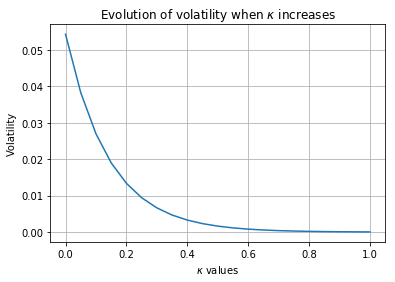

In [67]:
l_kappa = [0 + 0.05*i for i in range(21)]

l_vol = []
for elem in l_kappa:
    a = vol_model1(0.233, elem, 7)
    l_vol.append(a)

plt.plot(l_kappa, l_vol)
plt.title('Evolution of volatility when $\kappa$ increases')
plt.xlabel('$\kappa$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()
    

The volatility in decreasing convexely.

***Influence of volatility by varying $T$ from 0 to 10 years.***

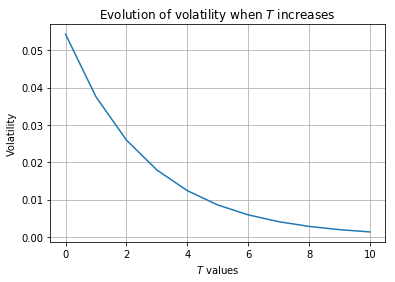

In [65]:
l_time = [0 + i for i in range(11)]

l_vol = []
for elem in l_time:
    a = vol_model1(0.233, 0.369, elem)
    l_vol.append(a)

plt.plot(l_time, l_vol)
plt.title('Evolution of volatility when $T$ increases')
plt.xlabel('$T$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()
    

The volatility in decreasing convexely.

***Influence of volatility by varying $\sigma^2$ from 0 to 2.***

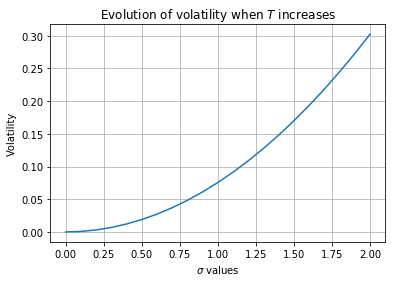

In [68]:
l_sigma = [0 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_sigma:
    a = vol_model1(elem, 0.369, 7)
    l_vol.append(a)

plt.plot(l_sigma, l_vol)
plt.title('Evolution of volatility when $T$ increases')
plt.xlabel('$\sigma$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

It increases convexely.

#### Model 2. 
We get $\sigma_{F}^{2}(T) = \displaystyle \sigma_{1}^{2} + \sigma_2^2\frac{(1-e^{-\kappa T})^2}{\kappa^2} - 2 \rho \sigma_1 \sigma_2 \frac{(1-e^{-\kappa T})}{\kappa}$ and thus $\sigma_{F}^{2}(\infty) = \displaystyle \sigma_1^{2} + \frac{\sigma_2^2}{\kappa^2} - \frac{2 \rho \sigma_1 \sigma_2}{\kappa}$.

In [69]:
def vol_model2(sigma1, sigma2, kappa, rho):
    return sigma1**2 + (sigma2**2)/(kappa**2) - 2*(rho*sigma1*sigma2)/(kappa)

***Influence of volatility by varying $\sigma_1$ from 0 to 2.***

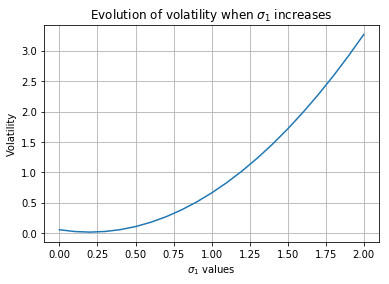

In [78]:
l_sigma1 = [0 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_sigma1:
    a = vol_model2(elem, 0.28, 1.156, 0.818)
    l_vol.append(a)

plt.plot(l_sigma1, l_vol)
plt.title('Evolution of volatility when $\sigma_{1}$ increases')
plt.xlabel('$\sigma_1$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Convex increase.

***Influence of volatility by varying $\sigma_2$ from 0 to 2.***

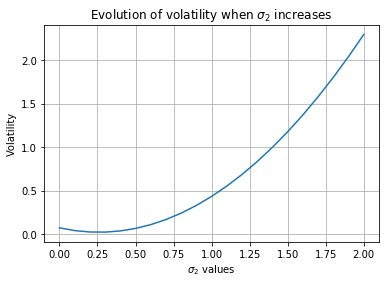

In [80]:
l_sigma2 = [0 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_sigma2:
    a = vol_model2(0.274, elem, 1.156, 0.818)
    l_vol.append(a)

plt.plot(l_sigma2, l_vol)
plt.title('Evolution of volatility when $\sigma_{2}$ increases')
plt.xlabel('$\sigma_2$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Convex increase.

***Influence of volatility by varying $\kappa$ from 1 to 3.***

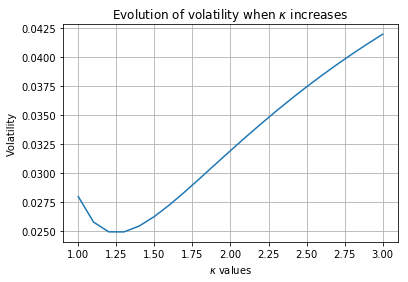

In [87]:
l_kappa = [1 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_kappa:
    a = vol_model2(0.274, 0.28, elem, 0.818)
    l_vol.append(a)

plt.plot(l_kappa, l_vol)
plt.title('Evolution of volatility when $\kappa$ increases')
plt.xlabel('$\kappa$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

***Influence of volatility by varying $\rho$ from -1 to 1.***

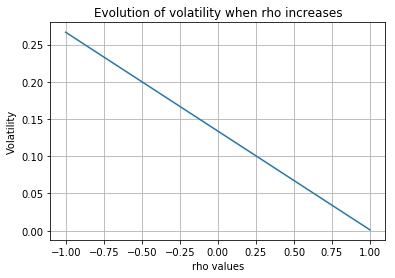

In [100]:
l_rho = [-1 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_rho:
    a = vol_model2(0.274, 0.28, 1.156, elem)
    l_vol.append(a)

plt.plot(l_rho, l_vol)
plt.title('Evolution of volatility when rho increases')
plt.xlabel('rho values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Volatility decreases linearly towards 0 when $\rho$ moves from -1 to 1.

#### Model 3. 
We get $\sigma_{F}^{2}(\infty) = \displaystyle \sigma_1^{2} + \frac{\sigma_2^2}{\kappa^2} + \frac{\sigma_3^2}{a^{2}} - \frac{2 \rho_1 \sigma_1 \sigma_2}{\kappa} + \frac{2 \rho_3 \sigma_1 \sigma_3}{a} - \frac{2 \rho_2 \sigma_2 \sigma_3}{a \kappa}$.

In [101]:
def vol_model3(sigma1, sigma2, sigma3, kappa, a, rho1, rho2, rho3):
    return sigma1**2 + (sigma2**2)/(kappa**2) + (sigma3**2)/(a**2) - (2*rho1*sigma1*sigma2)/(kappa) + (2*rho3*sigma1*sigma3)/(a) - (2*rho2*sigma2*sigma3)/(a*kappa)

***Influence of volatility by varying $\sigma_1$ from 0 to 1.***

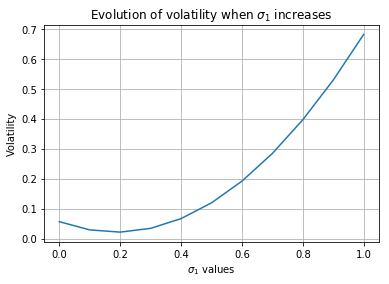

In [105]:
l_sigma1 = [0 + 0.1*i for i in range(11)]

l_vol = []
for elem in l_sigma1:
    a = vol_model3(elem, 0.249, 0.0096, 1.045, 0.2, 0.805, 0.1243, 0.0964)
    l_vol.append(a)

plt.plot(l_sigma1, l_vol)
plt.title('Evolution of volatility when $\sigma_1$ increases')
plt.xlabel('$\sigma_1$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Volatility increases convexely.

***Influence of volatility by varying $\sigma_2$ from 0 to 1.***

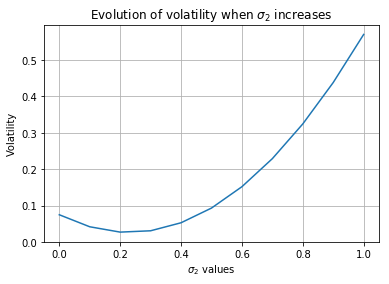

In [106]:
l_sigma2 = [0 + 0.1*i for i in range(11)]

l_vol = []
for elem in l_sigma2:
    a = vol_model3(0.266, elem, 0.0096, 1.045, 0.2, 0.805, 0.1243, 0.0964)
    l_vol.append(a)

plt.plot(l_sigma2, l_vol)
plt.title('Evolution of volatility when $\sigma_2$ increases')
plt.xlabel('$\sigma_2$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Volatility increases convexely.

***Influence of volatility by varying $\sigma_3$ from 0 to 1.***

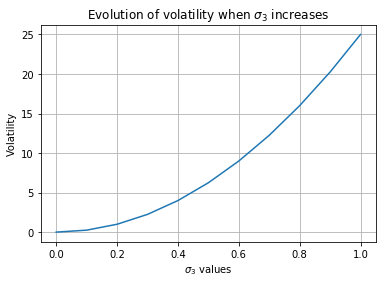

In [108]:
l_sigma3 = [0 + 0.1*i for i in range(11)]

l_vol = []
for elem in l_sigma3:
    a = vol_model3(0.266, 0.249, elem, 1.045, 0.2, 0.805, 0.1243, 0.0964)
    l_vol.append(a)

plt.plot(l_sigma3, l_vol)
plt.title('Evolution of volatility when $\sigma_3$ increases')
plt.xlabel('$\sigma_3$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Volatility increases convexely.

***Influence of volatility by varying $\sigma_3$ from 0 to 3.***

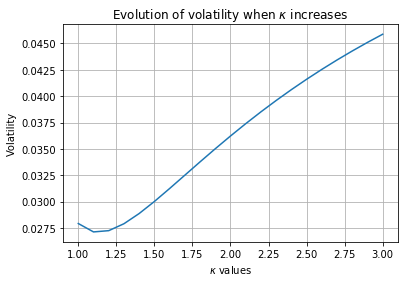

In [109]:
l_kappa = [1 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_kappa:
    a = vol_model3(0.266, 0.249, 0.0096, elem, 0.2, 0.805, 0.1243, 0.0964)
    l_vol.append(a)

plt.plot(l_kappa, l_vol)
plt.title('Evolution of volatility when $\kappa$ increases')
plt.xlabel('$\kappa$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

***Influence of volatility by varying $a$ from 0 to 5.***

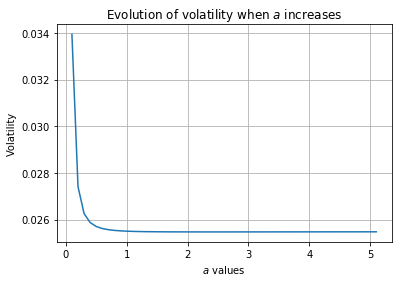

In [112]:
l_a = [0.1 + 0.1*i for i in range(51)] 

l_vol = []
for elem in l_a:
    a = vol_model3(0.266, 0.249, 0.0096, 1.045, elem, 0.805, 0.1243, 0.0964)
    l_vol.append(a)

plt.plot(l_a, l_vol)
plt.title('Evolution of volatility when $a$ increases')
plt.xlabel('$a$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Convergence towards a fixed value.

***Influence of volatility by varying $\rho_1$ from -1 to 1.***

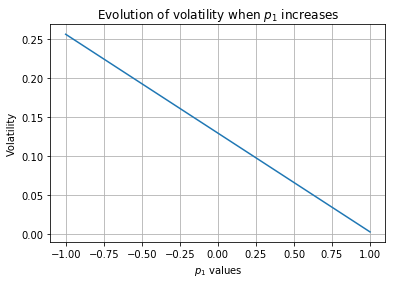

In [115]:
l_rho1 = [-1 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_rho1:
    a = vol_model3(0.266, 0.249, 0.0096, 1.045, 0.2, elem, 0.1243, 0.0964)
    l_vol.append(a)

plt.plot(l_rho1, l_vol)
plt.title('Evolution of volatility when $p_1$ increases')
plt.xlabel('$p_1$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Convergence towards 0.

***Influence of volatility by varying $\rho_2$ from -1 to 1.***

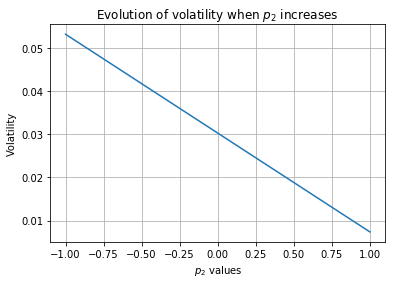

In [116]:
l_rho2 = [-1 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_rho2:
    a = vol_model3(0.266, 0.249, 0.0096, 1.045, 0.2, 0.805, elem, 0.0964)
    l_vol.append(a)

plt.plot(l_rho2, l_vol)
plt.title('Evolution of volatility when $p_2$ increases')
plt.xlabel('$p_2$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Once again, convergence towards 0.

***Influence of volatility by varying $\rho_3$ from -1 to 1.***

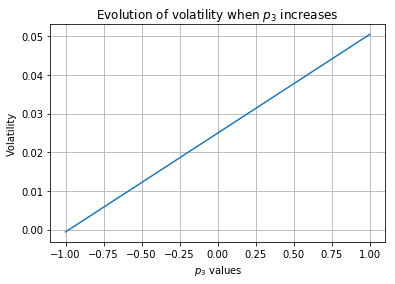

In [117]:
l_rho3 = [-1 + 0.1*i for i in range(21)]

l_vol = []
for elem in l_rho3:
    a = vol_model3(0.266, 0.249, 0.0096, 1.045, 0.2, 0.805, 0.1243, elem)
    l_vol.append(a)

plt.plot(l_rho3, l_vol)
plt.title('Evolution of volatility when $p_3$ increases')
plt.xlabel('$p_3$ values')
plt.ylabel('Volatility')
plt.grid(True)
plt.show()

Linear increase.

### B. Long maturity Futures contracts.

#### Model 2.
$\displaystyle \frac{1}{F}\frac{\partial F}{\partial T}(T \longrightarrow \infty) = \displaystyle r - \alpha + \frac{\lambda}{\kappa} + \frac{\sigma_2^2}{2 \kappa^2} - \frac{\rho \sigma_1 \sigma_2}{\kappa} = \displaystyle 0.06 - \alpha + \frac{\lambda}{\kappa} + \frac{\sigma_2^2}{2 \kappa^2} - \frac{\rho \sigma_1 \sigma_2}{\kappa}$

In [118]:
def long_term_model2(alpha, lamb, k, sigma1, sigma2, rho):
    return 0.06 - alpha + (lamb)/(k) + (sigma2**2)/(2*k**2) - (rho*sigma1*sigma2)/(k)

***Influence of LTFC by varying $\alpha$ from 0 to 1.***

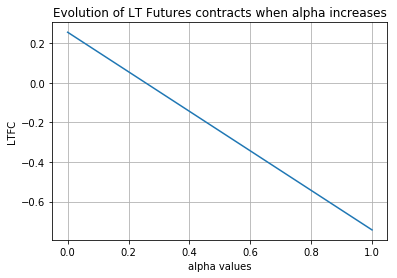

In [124]:
l_alpha = [0 + i*0.1 for i in range(11)]

l_res = []
for elem in l_alpha:
    a = long_term_model2(elem, 0.256, 1.156, 0.274, 0.28, 0.818)
    l_res.append(a)

plt.plot(l_alpha, l_res)
plt.title('Evolution of LT Futures contracts when alpha increases')
plt.xlabel('alpha values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

Linear decrease.

***Influence of LTFC by varying $\lambda$ from 0 to 1.***

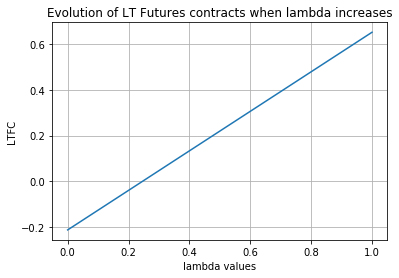

In [125]:
l_alpha = [0 + i*0.1 for i in range(11)]

l_res = []
for elem in l_alpha:
    a = long_term_model2(0.248, elem, 1.156, 0.274, 0.28, 0.818)
    l_res.append(a)

plt.plot(l_alpha, l_res)
plt.title('Evolution of LT Futures contracts when lambda increases')
plt.xlabel('lambda values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

Linear increase.

***Influence of LTFC by varying $\kappa$ from 1 to 5.***

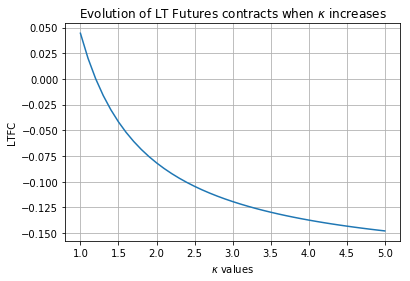

In [126]:
l_kappa = [1 + i*0.1 for i in range(41)]

l_res = []
for elem in l_kappa:
    a = long_term_model2(0.248, 0.256, elem, 0.274, 0.28, 0.818)
    l_res.append(a)

plt.plot(l_kappa, l_res)
plt.title('Evolution of LT Futures contracts when $\kappa$ increases')
plt.xlabel('$\kappa$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

We get some negative values because this calibration is not robust to long term maturities.

***Influence of LTFC by varying $\sigma_1$ from 0 to 1.***

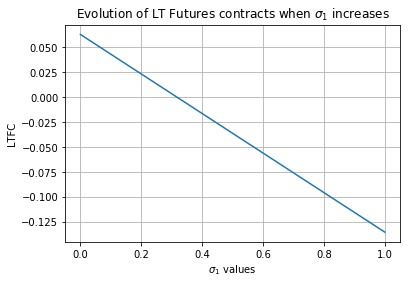

In [129]:
l_kappa = [0 + i*0.1 for i in range(11)]

l_res = []
for elem in l_kappa:
    a = long_term_model2(0.248, 0.256, 1.156, elem, 0.28, 0.818)
    l_res.append(a)

plt.plot(l_kappa, l_res)
plt.title('Evolution of LT Futures contracts when $\sigma_1$ increases')
plt.xlabel('$\sigma_1$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

We get some negative values because this calibration is not robust to long term maturities.

***Influence of LTFC by varying $\sigma_2$ from 0 to 1.***

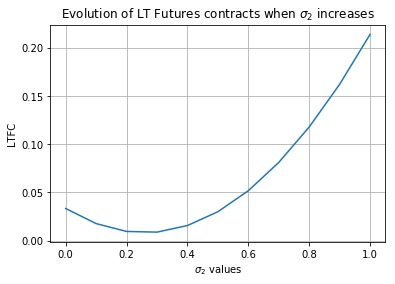

In [130]:
l_kappa = [0 + i*0.1 for i in range(11)]

l_res = []
for elem in l_kappa:
    a = long_term_model2(0.248, 0.256, 1.156, 0.274, elem, 0.818)
    l_res.append(a)

plt.plot(l_kappa, l_res)
plt.title('Evolution of LT Futures contracts when $\sigma_2$ increases')
plt.xlabel('$\sigma_2$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

Increases with a convex way.

***Influence of LTFC by varying $\rho$ from -1 to 1.***

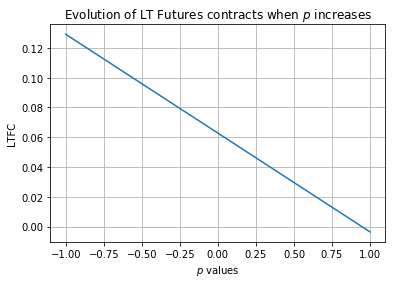

In [132]:
l_rho = [-1 +0.1*i for i in range(21)]

l_res = []
for elem in l_rho:
    a = long_term_model2(0.248, 0.256, 1.156, 0.274, 0.28, elem)
    l_res.append(a)

plt.plot(l_rho, l_res)
plt.title('Evolution of LT Futures contracts when $p$ increases')
plt.xlabel('$p$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

#### Model 3.
$\displaystyle \frac{1}{F}\frac{\partial F}{\partial T}(T \longrightarrow \infty) = \displaystyle m^{*} - \alpha + \frac{\lambda}{\kappa} + \frac{\sigma_2^2}{2 \kappa^2} - \frac{\rho_1 \sigma_1 \sigma_2}{\kappa} + \frac{\sigma_3^2}{2a^2} + \frac{\rho_3 \sigma_1 \sigma_2}{a} - \frac{\rho_2 \sigma_2 \sigma_3}{\kappa a}$

In [133]:
def long_term_model3(m,alpha,lamb,k,sigma1,sigma2,sigma3,rho1,rho2,rho3,a):
    res = m - alpha + (lamb)/(k) + (sigma2**2)/(2*k**2) - (rho1*sigma1*sigma2)/(k)\
    + (sigma3**2)/(2*a**2) + (rho3*sigma1*sigma3)/(a) - (rho2*sigma2*sigma3)/(k*a)
    return res

In [134]:
a = long_term_model3(0.07,0.255,0.243,1.045,0.266,0.249,0.0096,0.805,0.1243,0.0964,0.2)

***Influence of LTFC by varying $m$ from 0.01 to 1.5***

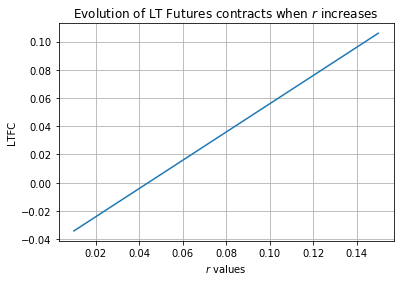

In [138]:
l_rate = [0.01 + 0.01*i for i in range(15)]

l_res = []
for elem in l_rate:
    a = long_term_model3(elem,0.255,0.243,1.045,0.266,0.249,0.0096,0.805,0.1243,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $r$ increases')
plt.xlabel('$r$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

It increases linearly.

***Influence of LTFC by varying $\alpha$ from 0 to 1***

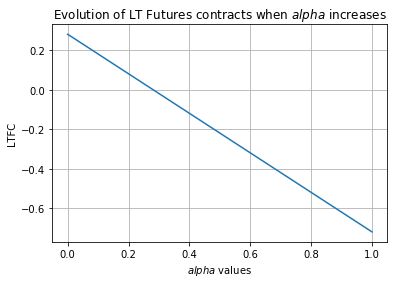

In [141]:
l_rate = [0 + 0.1*i for i in range(11)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,elem,0.243,1.045,0.266,0.249,0.0096,0.805,0.1243,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $alpha$ increases')
plt.xlabel('$alpha$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

We get some negative values because this calibration is not robust to long term maturities.

***Influence of LTFC by varying $\lambda$ from 0 to 1***

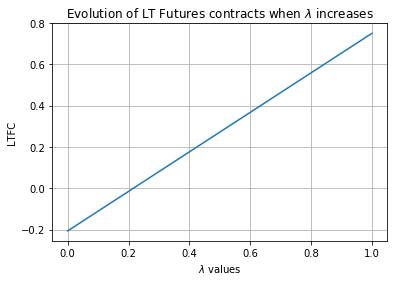

In [142]:
l_rate = [0 + 0.1*i for i in range(11)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,elem,1.045,0.266,0.249,0.0096,0.805,0.1243,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $\lambda$ increases')
plt.xlabel('$\lambda$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

We get some negative values because this calibration is not robust to long term maturities.

***Influence of LTFC by varying $\kappa$ from 1 to 5***

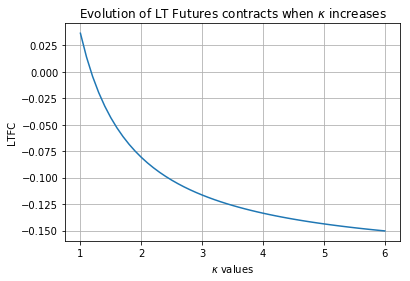

In [144]:
l_rate = [1 + 0.1*i for i in range(51)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,0.243,elem,0.266,0.249,0.0096,0.805,0.1243,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $\kappa$ increases')
plt.xlabel('$\kappa$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

We get some negative values because this calibration is not robust to long term maturities.

***Influence of LTFC by varying $\sigma_1$ from 0 to 1***

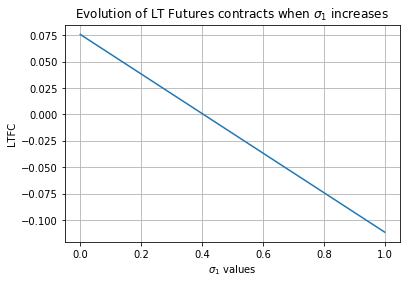

In [145]:
l_rate = [0 + 0.1*i for i in range(11)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,0.243,1.045,elem,0.249,0.0096,0.805,0.1243,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $\sigma_1$ increases')
plt.xlabel('$\sigma_1$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

We get some negative values because this calibration is not robust to long term maturities.

***Influence of LTFC by varying $\sigma_2$ from 0 to 1***

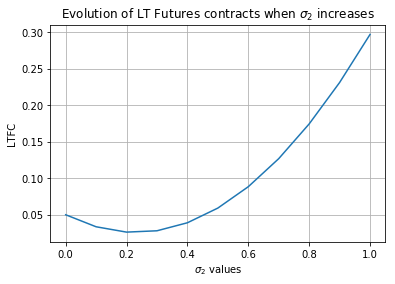

In [147]:
l_rate = [0 + 0.1*i for i in range(11)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,0.243,1.045,0.266,elem,0.0096,0.805,0.1243,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $\sigma_2$ increases')
plt.xlabel('$\sigma_2$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

It increases with a convex form.

***Influence of LTFC by varying $\sigma_3$ from 0 to 1***

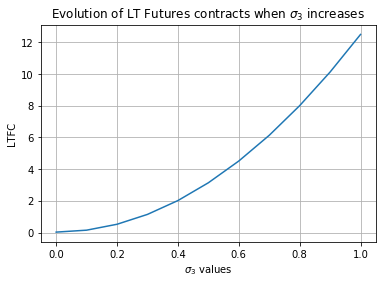

In [148]:
l_rate = [0 + 0.1*i for i in range(11)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,0.243,1.045,0.266,0.249,elem,0.805,0.1243,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $\sigma_3$ increases')
plt.xlabel('$\sigma_3$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

Because such an hypothesis on the value of $\sigma_3$ implies unrealistic values of $r$ !!!

***Influence of LTFC by varying $\rho_1$ from -1 to 1***

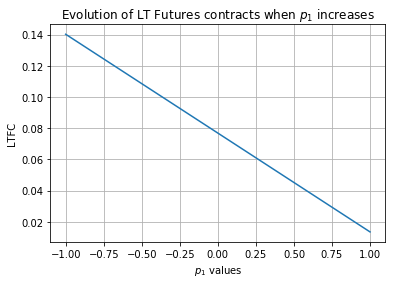

In [150]:
l_rate = [-1 + 0.1*i for i in range(21)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,0.243,1.045,0.266,0.249,0.0096,elem,0.1243,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $p_1$ increases')
plt.xlabel('$p_1$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

It decreases linearly.

***Influence of LTFC by varying $\rho_2$ from -1 to 1***

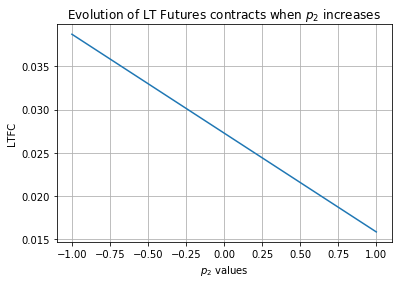

In [151]:
l_rate = [-1 + 0.1*i for i in range(21)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,0.243,1.045,0.266,0.249,0.0096,0.805,elem,0.0964,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $p_2$ increases')
plt.xlabel('$p_2$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

It decreases linearly.

***Influence of LTFC by varying $\rho_3$ from -1 to 1***

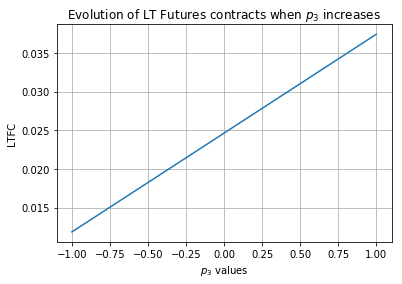

In [152]:
l_rate = [-1 + 0.1*i for i in range(21)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,0.243,1.045,0.266,0.249,0.0096,0.805,0.1243,elem,0.2)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $p_3$ increases')
plt.xlabel('$p_3$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

It increases linearly.

***Influence of LTFC by varying $a$ from 0 to 1***

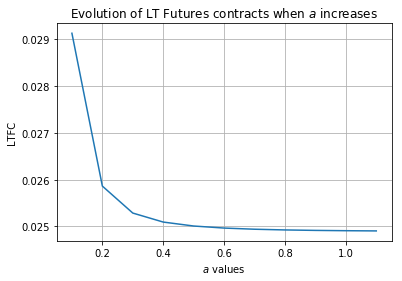

In [154]:
l_rate = [0.1 + 0.1*i for i in range(11)]

l_res = []
for elem in l_rate:
    a = long_term_model3(0.07,0.255,0.243,1.045,0.266,0.249,0.0096,0.805,0.1243,0.0964,elem)
    l_res.append(a)

plt.plot(l_rate, l_res)
plt.title('Evolution of LT Futures contracts when $a$ increases')
plt.xlabel('$a$ values')
plt.ylabel('LTFC')
plt.grid(True)
plt.show()

It decreases.

### C. Investment under uncertainty. 

We will only use the simplest model available to perform the analysis i.e. **constant convenience yield.**

**Project description:** let us consider a copper mine that can produce one ounce of copper at the end of each year for ten years. Suppose that the initial investment required is $K = 2$ and the unit cost of production is $C = 0.4$$ (constant for ten years). Assume that once the investment is done production will go ahead for the following ten years. That is, we neglect in this analysis the options to close and open the mine and the option to abandon it, and concentrate on the option to invest.

**Decision procedure:** (1) The first step in all the procedures we will discuss consists in the determination of the net present value of the project once it has been decided to go ahead the with the investment. (2) The second step consists in the evaluation of the option to invest (considering the Net Present Value).

As a reminder, in the methods that use the real options approach to valuation, instead of discounting expected cash flows at a risk-adjusted discount rate, certainty equivalent cash flows are discounted at the risk-free interest rate. For commodities this certainty equivalent cash flow is related to the forward price of the underlying commodity, which is equal to the futures price if the interest rate is constant. 

**Model specification:** In the constant convenience yield model, the risk-adjusted process for the spot price commodity price is assumed to follow a geometric Brownian motion:

$\displaystyle \frac{dS}{S} = (r-c)dt + \sigma dz^*$ where $c$ is the convenience yield. The net present value of the project is initially written:

$\text{NPV} = \displaystyle \sum_{T=1}^{10}P(r,T,\cdot) - C \sum_{T=1}^{10} B(r,T) - K = S \sum_{T=1}^{10}e^{-cT} - C \sum_{T=1}^{10} e^{-rT} - K = S \beta_1 - \beta_2$ and the option to invest $V(S)$ satisfies the ordinary differentiel equation:

$\frac{1}{2}\sigma^2 S^2 V_{SS} + (r - c)SV_{S} - rV = 0$ subject to the boundary condition: $V(S) \geq \max \left[S \beta_1 - \beta_2,0 \right]$.

**Solution:** $V(S) = \left(S^{*} - \beta_2 \right)\left(\frac{S}{S^*}\right)^{d}$ and $S^* = \displaystyle \frac{d \beta_2}{\beta_1 (d-1)}$ and $d = \displaystyle \frac{1}{2} - \frac{r-c}{\sigma^2} + \sqrt{\left(\frac{1}{2} - \frac{r-c}{\sigma^2}\right)^{2} + \frac{2r}{\sigma^2}}$ where $S^{*}$ is the commodity price above which it is optimal to invest in the project. 

**Implementation.**

In [24]:
def d_model(r, c, sigma):
    return round(0.5 - (r - c)/(sigma**2) + \
    np.sqrt((0.5 - (r - c)/(sigma**2))**2 + (2*r)/(sigma**2)),3)

def price_min(r, c, sigma):
    beta1 = 0
    for i in range(1,11):
        beta1 += np.exp(-c*i)
    beta2 = 2
    for i in range(1,11):
        beta2 += 0.4*np.exp(-r*i)
    d = d_model(r, c, sigma)
    return round((d*beta2)/(beta1*(d-1)),3)

def V(S, r, c, sigma):
    S_star = price_min(r, c, sigma)
    beta1 = 0
    for i in range(1,11):
        beta1 += np.exp(-c*i)
    beta2 = 2
    for i in range(1,11):
        beta2 += 0.4*np.exp(-r*i)
    d = d_model(r, c, sigma)
    return round((S_star*beta1 - beta2)*(S/S_star)**d,3)

Calibration through the values given in the article: $r = 0.06$, $c = 0.118$ and $\sigma = 0.266$.

In [25]:
d_model(0.06, 0.118, 0.266)
price_min(0.06, 0.118, 0.266)
V(10,0.06,0.118,0.266)

3.174

**Analyzing the sensitivity of these values to the parameters of the model.**

Values which will be tested.

In [50]:
l_rate = [round(-0.02 + 0.01*i,2) for i in range(18)]
l_conv = [round(0.05 + 0.05*i,2) for i in range(20)]
l_vol = [round(0.5 + 0.05*i,2) for i in range(21)]
print('Interest rates', l_rate)
print('************************')
print('Convenience yields', l_conv)
print('************************')
print('Volatilities', l_vol)

Interest rates [-0.02, -0.01, 0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15]
************************
Convenience yields [0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]
************************
Volatilities [0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.25, 1.3, 1.35, 1.4, 1.45, 1.5]


**Commodity price above which it is optimal to invest: comparative statics**

***By varying the interest rate***

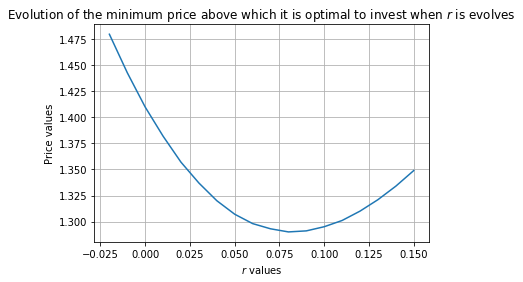

In [40]:
l_plot = []
for elem in l_rate:
    a = price_min(elem, 0.118, 0.266)
    l_plot.append(a)
plt.plot(l_rate, l_plot)
plt.title('Evolution of the minimum price above which it is optimal to invest when $r$ is evolves')
plt.xlabel('$r$ values')
plt.ylabel('Price values')
plt.grid(True)
plt.show()

***By varying the convenience yield***

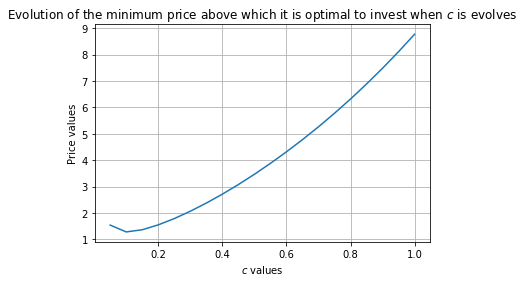

In [51]:
l_plot = []
for elem in l_conv:
    a = price_min(0.06, elem, 0.266)
    l_plot.append(a)
plt.plot(l_conv, l_plot)
plt.title('Evolution of the minimum price above which it is optimal to invest when $c$ is evolves')
plt.xlabel('$c$ values')
plt.ylabel('Price values')
plt.grid(True)
plt.show()

***By varying the volatility***

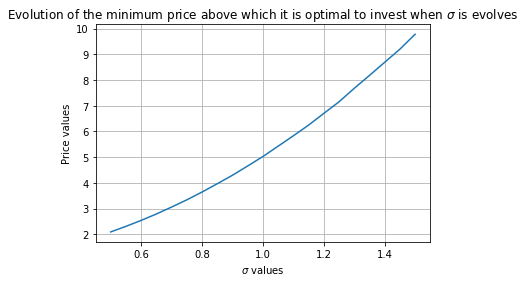

In [45]:
l_plot = []
for elem in l_vol:
    a = price_min(0.06, 0.118, elem)
    l_plot.append(a)
plt.plot(l_vol, l_plot)
plt.title('Evolution of the minimum price above which it is optimal to invest when $\sigma$ is evolves')
plt.xlabel('$\sigma$ values')
plt.ylabel('Price values')
plt.grid(True)
plt.show()

Conclusion: the minimum commodity price above which it is optimal to invest increases when the volatility increases and when the convenience yield increases. It decreases and then increases when the interest rate increases, reaching a (local ?) minimum around $r = 7.5\%$.

**Commodity price above which it is optimal to invest: comparative statics**

We will run the analysis with $S = 10$.

***By varying the interest rate***

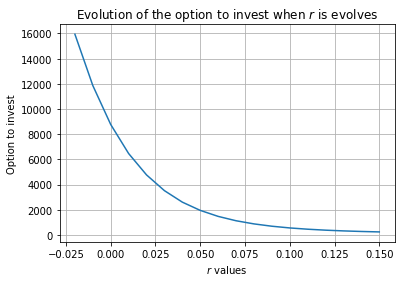

In [57]:
l_plot = []
for elem in l_rate:
    a = V(10, elem, 0.118, 0.266)
    l_plot.append(a)
plt.plot(l_rate, l_plot)
plt.title('Evolution of the option to invest when $r$ is evolves')
plt.xlabel('$r$ values')
plt.ylabel('Option to invest')
plt.grid(True)
plt.show()

As far as $r$ increases, it clearly decreases!

***By varying the convenience yield***

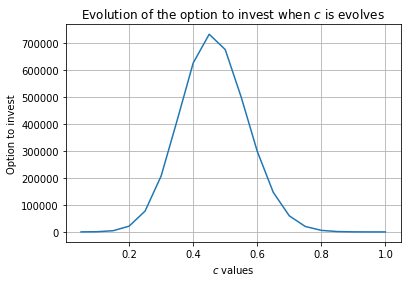

In [59]:
l_plot = []
for elem in l_conv:
    a = V(10, 0.06, elem, 0.266)
    l_plot.append(a)
plt.plot(l_conv, l_plot)
plt.title('Evolution of the option to invest when $c$ is evolves')
plt.xlabel('$c$ values')
plt.ylabel('Option to invest')
plt.grid(True)
plt.show()

A maximum around $c = 0.5$

***By varying the volatility***

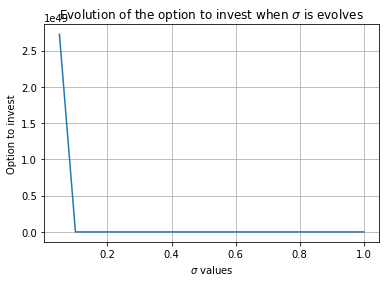

In [60]:
l_plot = []
for elem in l_conv:
    a = V(10, 0.06, 0.118, elem)
    l_plot.append(a)
plt.plot(l_conv, l_plot)
plt.title('Evolution of the option to invest when $\sigma$ is evolves')
plt.xlabel('$\sigma$ values')
plt.ylabel('Option to invest')
plt.grid(True)
plt.show()